# DATA IMPORTS FOR TEKSCAN/AIRPRESSURE ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import savgol_filter

# Load data into a pandas DataFrame
data = pd.read_csv('/content/Felicia_2HINT_Butt_C.csv') #,index_col=False
air_data = pd.read_csv('/content/Felicia_celldata.csv',index_col=False)



: 

In [ ]:
data = data.dropna()
air_data = air_data.dropna()
air_data
#data

,Date/Time,Right_Butt,Left_Upper,Left_Lower,Right_Lower,Right_Upper,Left_Butt
0,18:50.1,100726.03,100680.36,100740.70,100769.53,100675.88,100765.26
1,15:27.4,100719.06,100655.56,100740.57,100774.96,100671.13,100759.12
2,15:27.4,100720.16,100682.02,100730.28,100766.46,100676.81,100750.99
3,15:27.4,100742.50,100643.82,100740.76,100771.73,100703.52,100793.82
4,15:27.4,100706.73,100681.20,100734.85,100771.80,100682.27,100798.32
...,...,...,...,...,...,...,...
7162,19:55.9,100914.85,100344.90,100362.91,100648.91,100645.72,100466.45
7163,19:57.0,100540.13,100550.79,100388.55,100768.29,100603.93,100476.67
7164,19:58.0,100440.42,100671.64,100448.82,100867.09,100658.24,100438.68
7165,19:59.1,100408.48,100139.18,100307.87,100417.13,100101.58,100394.95


# AIR CELL ANALYSIS

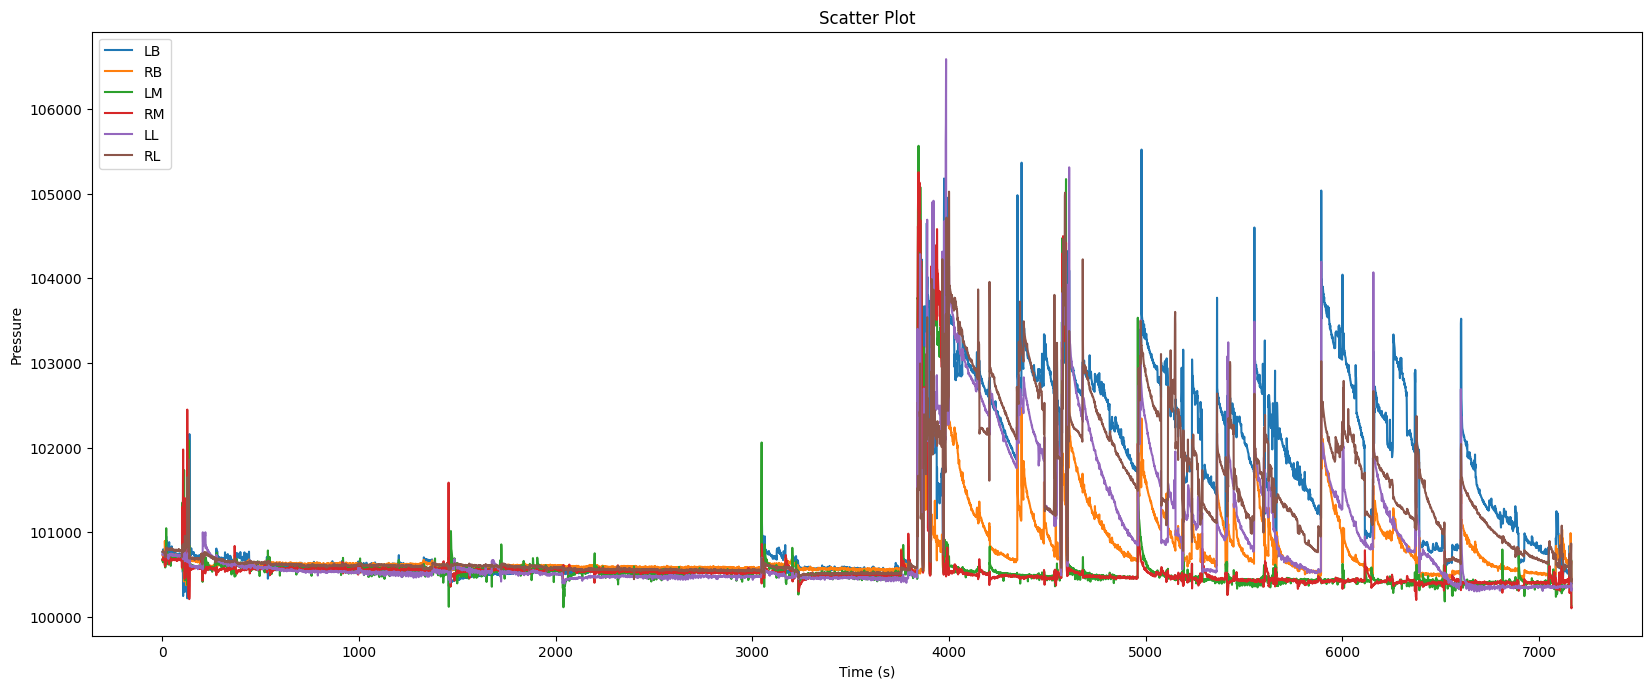

In [ ]:
##AIR CELL CODE
air_lb = air_data['Left_Butt']
air_rb = air_data['Right_Butt']
air_lm = air_data['Left_Upper']
air_rm = air_data['Right_Upper']
air_ll = air_data['Left_Lower']
air_rl = air_data['Right_Lower']

# Extract the columns that we want to plot
figure(figsize=(20, 8), dpi=100)


''' Calculate some basic statistics on the data
mean_x = np.mean(lb)
mean_y = np.mean(rb)
std_dev_x = np.std(lb)
std_dev_y = np.std(rb)
'''
# Create a scatter plot of the data
plt.plot(air_data.index, air_lb,label="LB")
plt.plot(air_data.index, air_rb,label="RB")

plt.plot(air_data.index, air_lm,label="LM")
plt.plot(air_data.index, air_rm,label="RM")

plt.plot(air_data.index, air_ll, label="LL")
plt.plot(air_data.index, air_rl, label="RL")

plt.title('Scatter Plot')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')

# Calculate and plot a linear regression line
#m, b = np.polyfit(lb, df_time, 1)
#plt.plot(lb, m*lb + b, color='red')

'''
# Display some statistics on the plot
textstr = f'Mean X: {mean_x:.2f}\nMean Y: {mean_y:.2f}\nStd Dev X: {std_dev_x:.2f}\nStd Dev Y: {std_dev_y:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
'''

# Save the plot to a file
plt.savefig('air_plot.png')
plt.legend(loc="upper left")
# Show the plot
plt.show()

<ipython-input-13-cb2a062b4051>:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


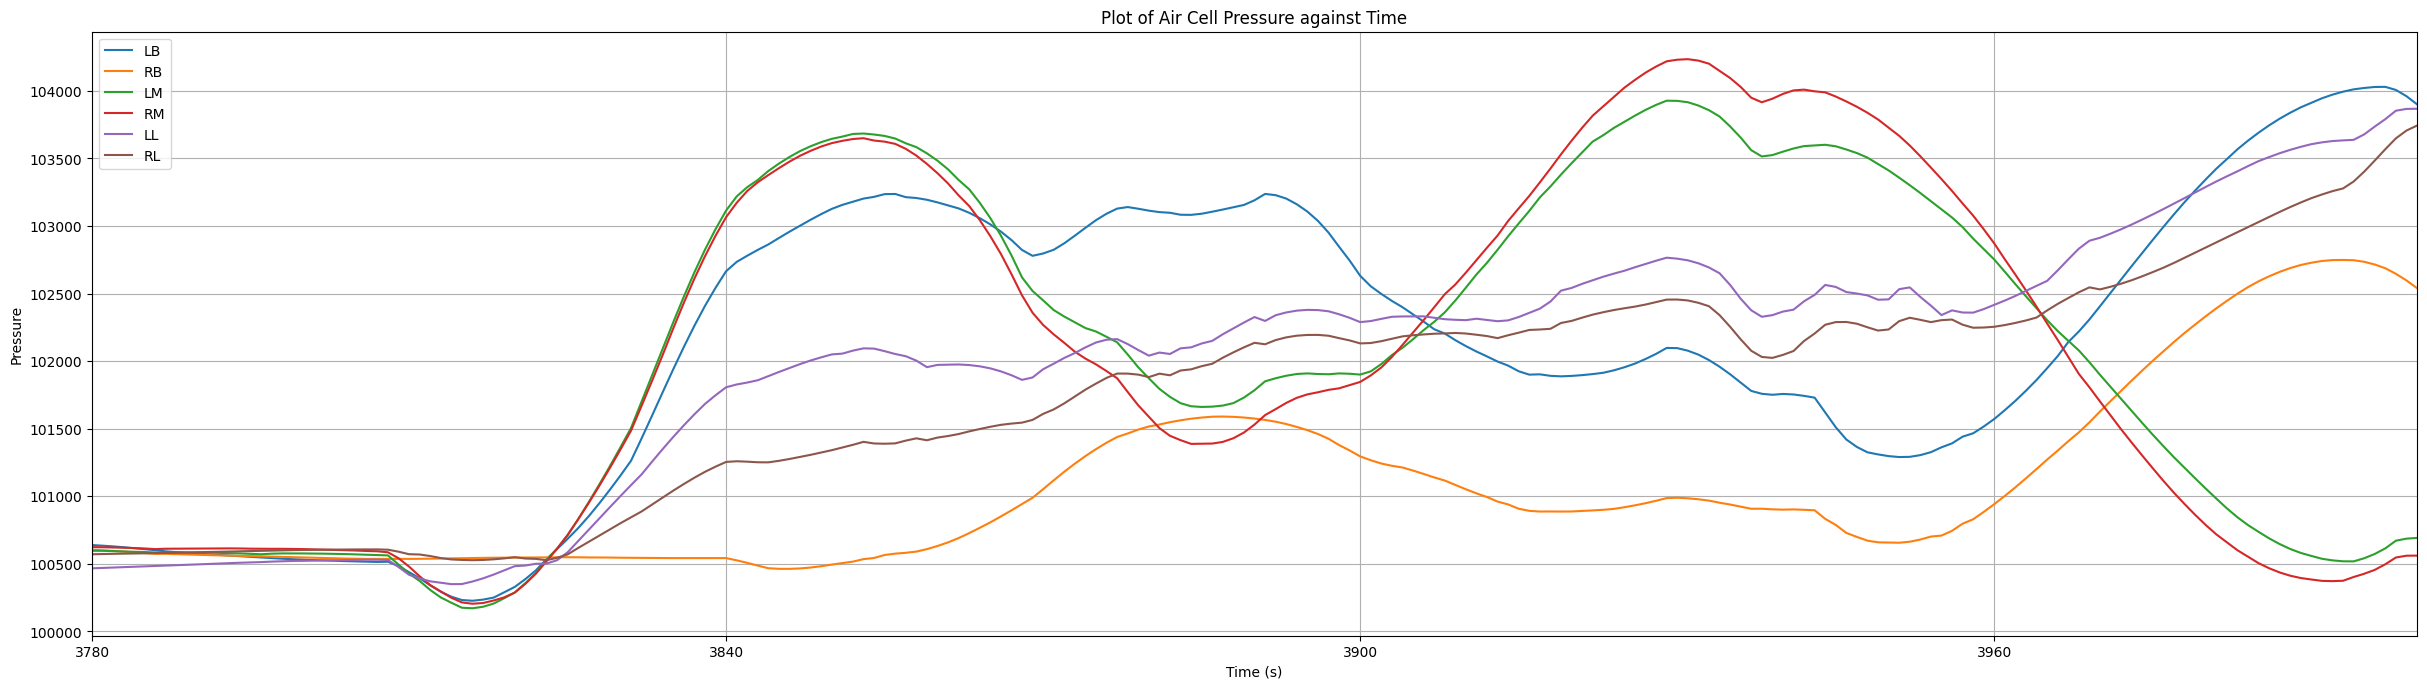

In [ ]:
##FILTERED AIR CODE
figure(figsize=(30, 8), dpi=100)
window_size = 60
order = 3

'''
mean_x = np.mean(pressure)
mean_y = np.mean(pressure)
std_dev_x = np.std(pressure)
std_dev_y = np.std(pressure)
textstr = f'Mean X: {mean_x:.2f}\nMean Y: {mean_y:.2f}\nStd Dev X: {std_dev_x:.2f}\nStd Dev Y: {std_dev_y:.2f}'
plt.text(0.05, 0.9, textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
'''
air_filtered_lb = savgol_filter(air_lb,window_size,order)
air_filtered_rb = savgol_filter(air_rb,window_size,order)
air_filtered_lm = savgol_filter(air_lm,window_size,order)
air_filtered_rm = savgol_filter(air_rm,window_size,order)
air_filtered_ll = savgol_filter(air_ll,window_size,order)
air_filtered_rl = savgol_filter(air_rl,window_size,order)


plt.plot(air_data.index,air_filtered_lb,label='LB')
plt.plot(air_data.index,air_filtered_rb,label='RB')
plt.plot(air_data.index,air_filtered_lm,label='LM')
plt.plot(air_data.index,air_filtered_rm,label='RM')
plt.plot(air_data.index,air_filtered_ll,label='LL')
plt.plot(air_data.index,air_filtered_rl,label='RL')

plt.title('Plot of Air Cell Pressure against Time')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')
plt.grid(b=True)
plt.xticks(np.arange(0,7200,60))
plt.xlim([3780, 4000])
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig('air_plot_filtered.png')
plt.show()

# TEKSCAN PRESSURE MAT ANALYSIS

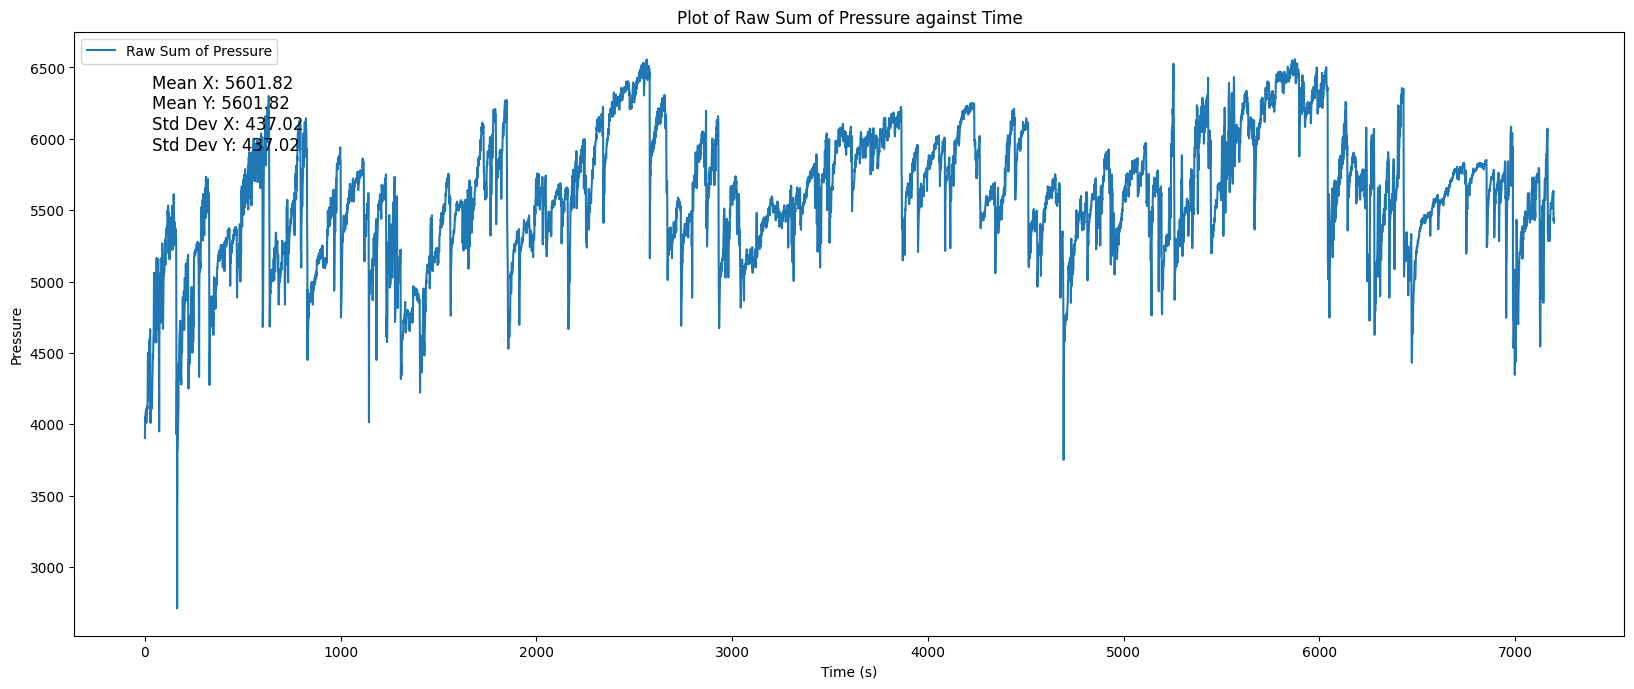

In [ ]:
##CODE FOR TEKSCAN

pressure = data[' Raw Sum']

# Extract the columns that we want to plot
figure(figsize=(20, 8), dpi=100)


# Calculate some basic statistics on the data
mean_x = np.mean(pressure)
mean_y = np.mean(pressure)
std_dev_x = np.std(pressure)
std_dev_y = np.std(pressure)

# Create a scatter plot of the data
plt.plot(data.index, pressure,label="Raw Sum of Pressure")
plt.title('Plot of Raw Sum of Pressure against Time')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')

# Calculate and plot a linear regression line
#m, b = np.polyfit(lb, df_time, 1)
#plt.plot(lb, m*lb + b, color='red')

# Display some statistics on the plot
textstr = f'Mean X: {mean_x:.2f}\nMean Y: {mean_y:.2f}\nStd Dev X: {std_dev_x:.2f}\nStd Dev Y: {std_dev_y:.2f}'
plt.text(0.05, 0.93, textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Save the plot to a file
plt.savefig('plot.png')
plt.legend(loc="upper left")
# Show the plot
plt.show()

<ipython-input-241-16e514528132>:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


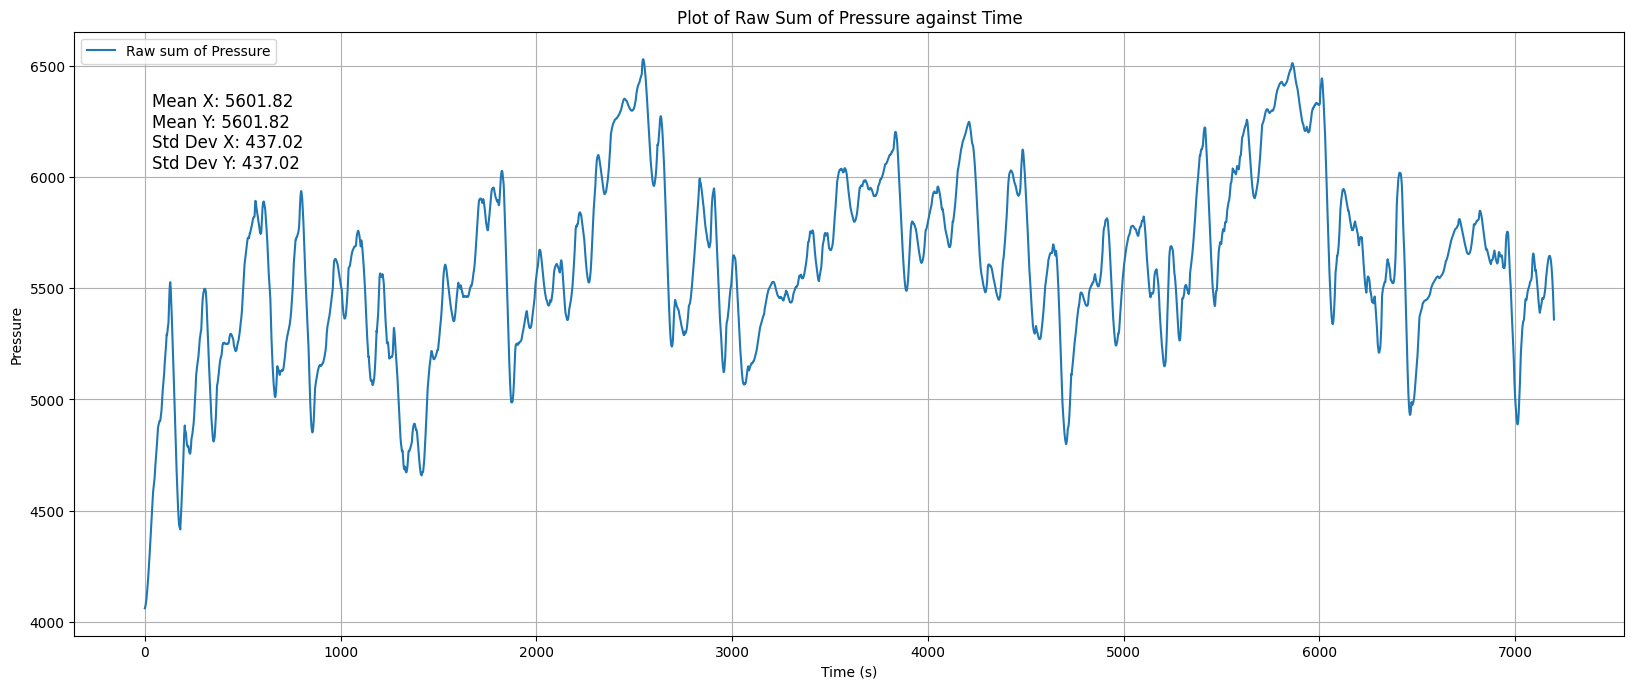

In [ ]:
figure(figsize=(20, 8), dpi=100)
window_size = 80
order = 3

mean_x = np.mean(pressure)
mean_y = np.mean(pressure)
std_dev_x = np.std(pressure)
std_dev_y = np.std(pressure)
textstr = f'Mean X: {mean_x:.2f}\nMean Y: {mean_y:.2f}\nStd Dev X: {std_dev_x:.2f}\nStd Dev Y: {std_dev_y:.2f}'
plt.text(0.05, 0.9, textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

p_filtered = savgol_filter(pressure,window_size,order)


plt.plot(data.index,p_filtered,label='Raw sum of Pressure')
plt.title('Plot of Raw Sum of Pressure against Time')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')
plt.grid(b=True)
plt.legend(loc='upper left')
plt.savefig('plot_filtered.png')
plt.show()


# COMBINED TEKSCAN + AIR CELL ANALYSIS

NameError: ignored

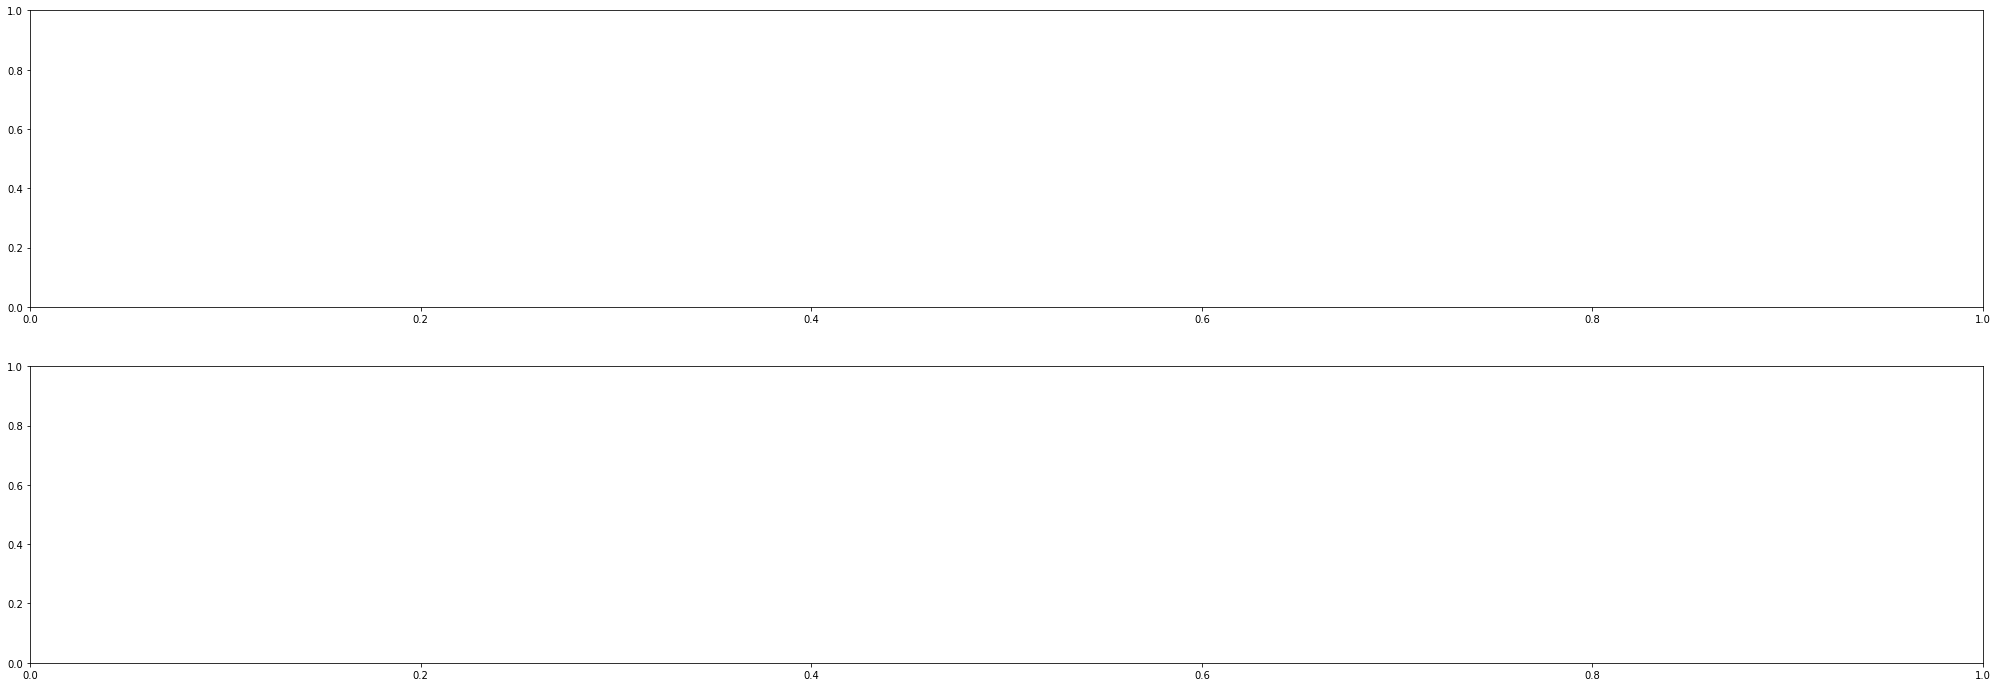

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(35,12))
shiftedx = air_data.index #20
ax1.plot(data.index,p_filtered,label='Raw sum of Pressure')
ax1.set(xlabel='time (s)',ylabel='Raw Sum of Pressure')
ax1.xaxis.set_ticks(np.arange(0,7200,60)) #600 because discomfort ratings recorded every 10 minutes
#ax1.set_xlim(2,21600)
ax1.set_xlim([3000, 7200])
ax1.set_title('Plot of Raw Sum of Pressure against Time')
ax2.set_title('Plot of Individual Air Cell Pressure against Time')

ax2.plot(shiftedx,air_filtered_lb,label='LB')
ax2.plot(shiftedx,air_filtered_rb,label='RB')
ax2.plot(shiftedx,air_filtered_lm,label='LM')
ax2.plot(shiftedx,air_filtered_rm,label='RM')
ax2.plot(shiftedx,air_filtered_ll,label='LL')
ax2.plot(shiftedx,air_filtered_rl,label='RL')

ax2.set(xlabel='time (s)',ylabel='Airpressure_RightButt (PA)')
ax2.xaxis.set_ticks(np.arange(0,7200,60))
ax2.set_xlim([3000, 7200])
ax1.grid(True)
ax2.grid(True)
ax2.legend(loc='upper left')
#ax3.set_title('Button press')
#ax3.set(xlabel='time (s)',ylabel='button')
#ax3.xaxis.set_ticks(np.arange(0,10800,600))
plt.savefig('filename1.png',dpi=300)


In [ ]:
data
#df_time = pd.to_datetime(data["Date/Time"]).dt.second
#data = data.drop(data[data.LB > 500].index)
#data = data.drop(data[data.RB > 500].index)
lb = data['LB']
mb = data['MB']
rb = data['RB']
lm = data['LM']
mm = data['MM']
rm = data['RM']
lu = data['LU']
mu = data['MU']
ru = data['RU']
#df_time


KeyError: ignored

# Velostat Pressure Mat Pressure Data Analysis

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import savgol_filter

# Load data into a pandas DataFrame
#data = pd.read_csv('/content/crosstalk_sample.csv') #,index_col=False
data = pd.read_csv('/content/ICM_data.csv')#,index_col=False)
data

,Date/Time,LL,ML,RL,LU,MU,RU,LB,MB,RB,AIR_RB,AIR_LU,AIR_LL,AIR_RL,AIR_RU,AIR_LB
0,14:47:20,21,21,21,21,21,22,21,21,21,100400.53,100341.40,100296.26,100366.57,100349.44,100382.36
1,14:47:21,21,21,21,22,21,21,21,21,21,100394.70,100344.84,100301.36,100365.31,100343.21,100380.92
2,14:47:22,20,21,21,21,21,21,21,21,21,100403.62,100346.95,100304.88,100373.73,100342.98,100388.00
3,14:47:23,21,21,21,21,21,20,21,21,21,100402.87,100342.25,100309.60,100367.58,100350.28,100389.16
4,14:47:25,575,35,421,549,525,483,359,572,511,100388.66,100328.88,100298.36,100366.95,100333.25,100398.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,15:47:25,589,426,616,598,600,617,589,626,598,100284.84,100229.39,100185.21,100249.29,100225.91,100266.50
3390,15:47:26,589,426,616,598,600,617,589,625,598,100285.96,100218.52,100188.85,100254.96,100221.27,100279.48
3391,15:47:27,589,426,616,598,600,617,589,625,598,100288.71,100225.58,100184.89,100243.64,100227.49,100278.51
3392,15:47:28,589,426,616,598,600,618,589,625,598,100291.57,100229.99,100202.20,100238.11,100224.25,100282.79


In [158]:
#data = data.iloc[4:]
cells = ['LL','ML','RL','LU','MU','RU','LB','MB','RB']
sliced_data = data.iloc[:, 0:10]

sliced_data
#df = sliced_data.values
#df

,Date/Time,LL,ML,RL,LU,MU,RU,LB,MB,RB
0,14:47:20,21,21,21,21,21,22,21,21,21
1,14:47:21,21,21,21,22,21,21,21,21,21
2,14:47:22,20,21,21,21,21,21,21,21,21
3,14:47:23,21,21,21,21,21,20,21,21,21
4,14:47:25,575,35,421,549,525,483,359,572,511
...,...,...,...,...,...,...,...,...,...,...
3389,15:47:25,589,426,616,598,600,617,589,626,598
3390,15:47:26,589,426,616,598,600,617,589,625,598
3391,15:47:27,589,426,616,598,600,617,589,625,598
3392,15:47:28,589,426,616,598,600,618,589,625,598


In [102]:
lb = data['LB']
mb = data['MB']
rb = data['RB']
lu = data['LU']
mu = data['MU']
ru = data['RU']
ll = data['LL']
ml = data['ML']
rl = data['RL']


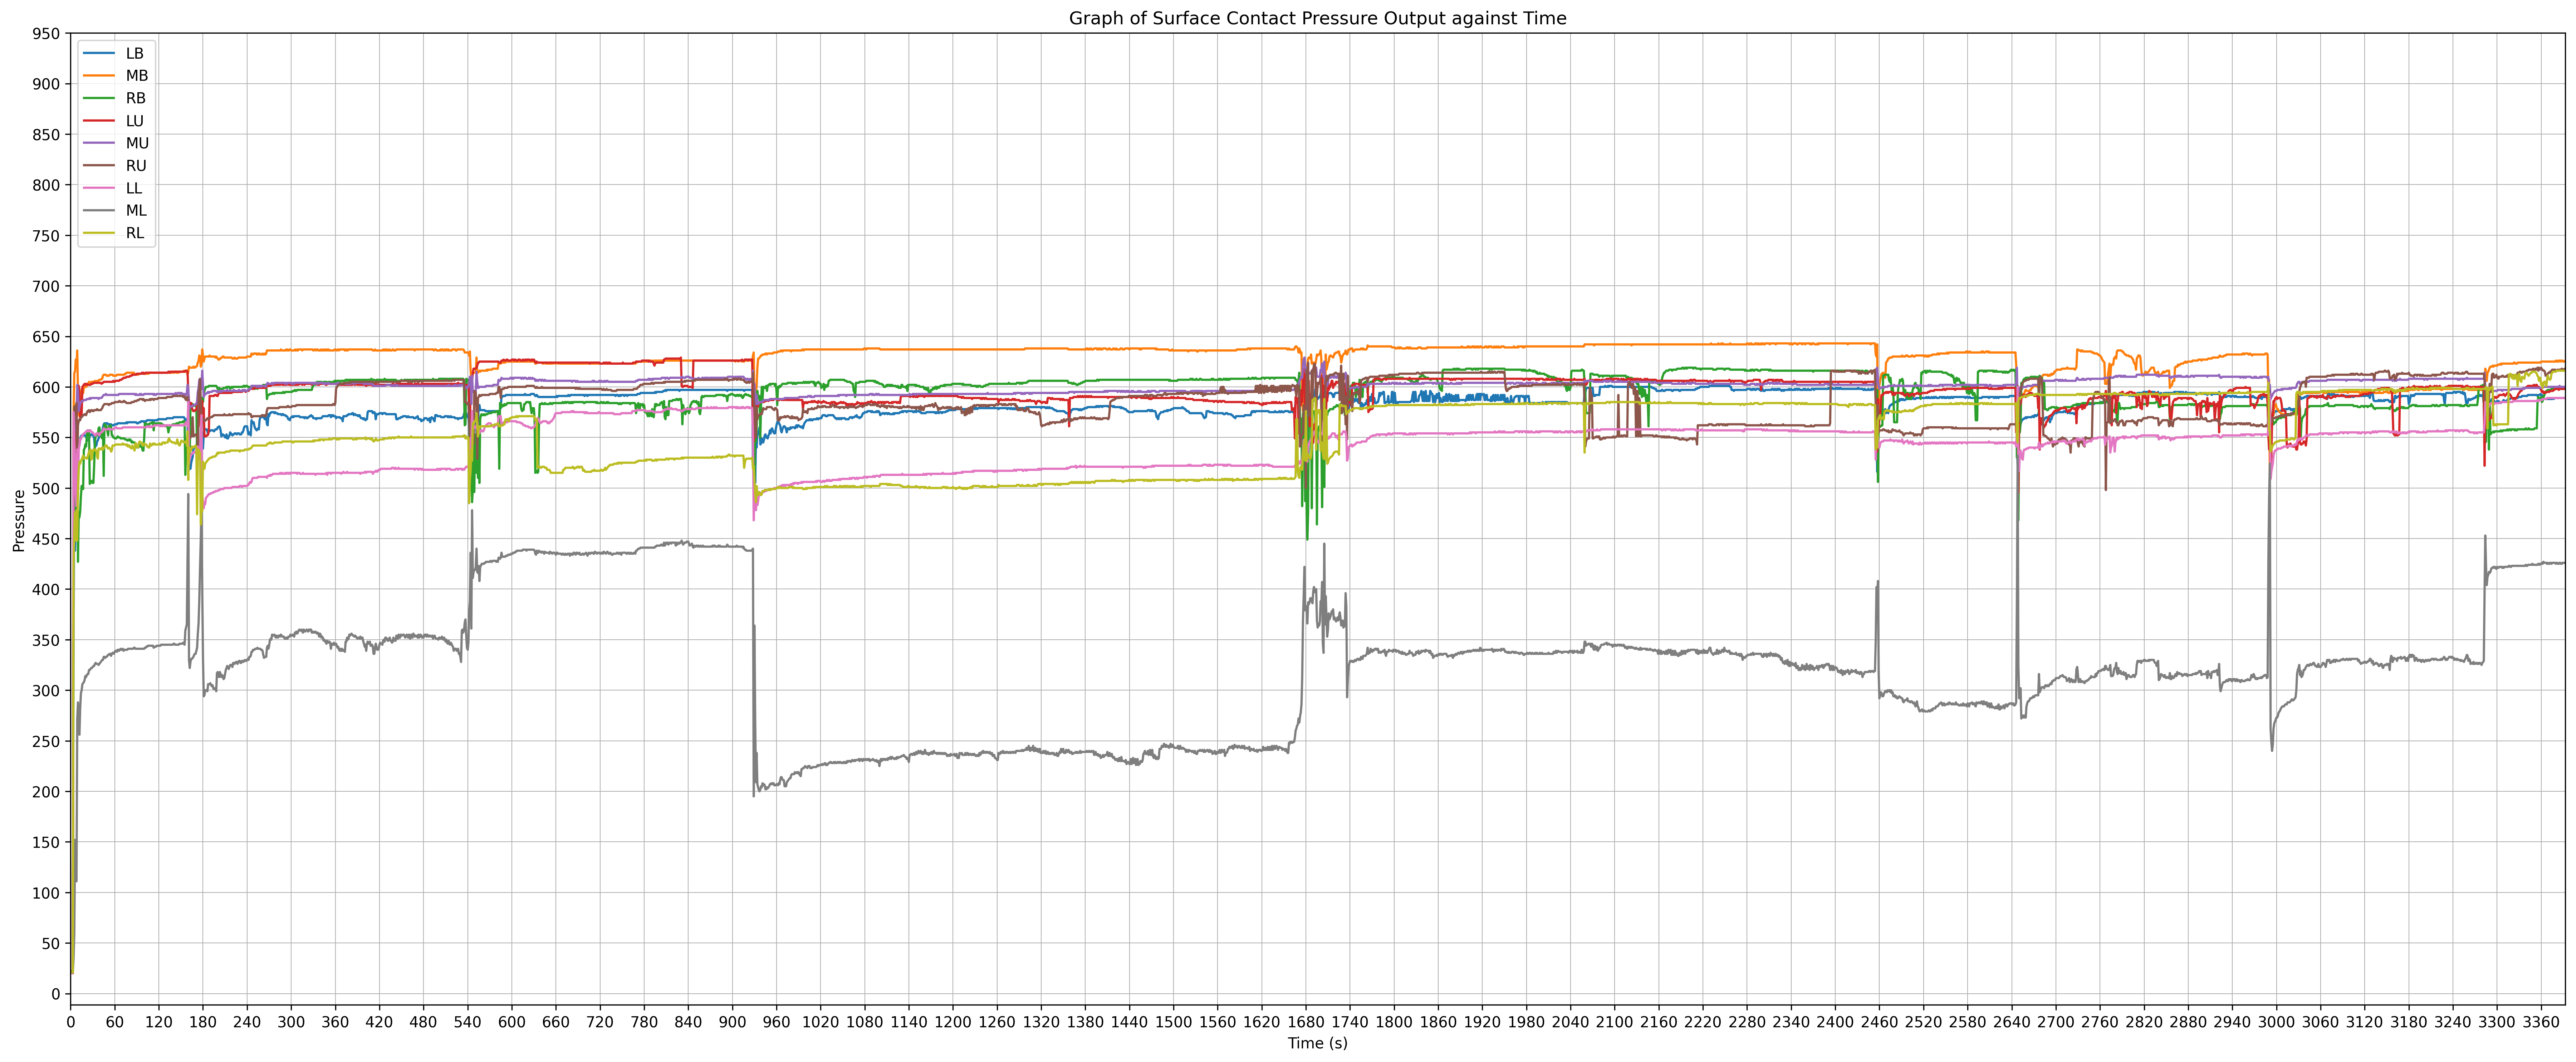

In [103]:
# Extract the columns that we want to plot
figure(figsize=(30, 12), dpi=300)
#data.index = data.index -1

'''
# Calculate some basic statistics on the data
mean_x = np.mean(lb)
mean_y = np.mean(rb)
std_dev_x = np.std(lb)
std_dev_y = np.std(rb)
'''

# Create a scatter plot of the data
plt.plot(data.index, lb,label="LB")
plt.plot(data.index, mb,label="MB")
plt.plot(data.index, rb,label="RB")
plt.plot(data.index, lu,label="LU")
plt.plot(data.index, mu,label="MU")
plt.plot(data.index, ru,label="RU")
plt.plot(data.index, ll, label="LL")
plt.plot(data.index, ml,label="ML")
plt.plot(data.index, rl, label="RL")
plt.title('Graph of Surface Contact Pressure Output against Time')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')
plt.xlim([0,max(data.index)])
plt.xticks(np.arange(0,max(data.index),60))
plt.yticks(np.arange(0,1000,50))
# Calculate and plot a linear regression line
#m, b = np.polyfit(lb, df_time, 1)
#plt.plot(lb, m*lb + b, color='red')
'''
# Display some statistics on the plot
textstr = f'Mean X: {mean_x:.2f}\nMean Y: {mean_y:.2f}\nStd Dev X: {std_dev_x:.2f}\nStd Dev Y: {std_dev_y:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
'''
#plt.minorticks_on()
# Save the plot to a file
#plt.grid(which='minor', linestyle='--', linewidth='0.5')
plt.grid(which='major', linestyle='-', linewidth='0.5')

plt.legend(loc="upper left")
# Show the plot
plt.savefig('scatter_plot.png')

plt.show()

# Sliding Window Implementation

In [88]:
windowsize = 60
step = 1

results = []
sliced_data = data.iloc[:, 1:10]
df = sliced_data.values
# Loop through the data with the sliding window
for i in range(0, len(df) - windowsize + 1, step):
    # Extract the window of data
    window = df[i:i+windowsize,:]

    # Calculate the mean and standard deviation of each cell in the window
    means = np.mean(window, axis=0)
    stds = np.std(window, axis=0)

    # Append the results to the list
    results.append((means, stds))

# Print the results for each cell
for cell in range(df.shape[1]-3):
    print(f"Results for cell {cell+1}:")
    for i, (mean, std) in enumerate(results):
        print(f"Window {i+1}: Mean = {mean[cell]:.2f}, Std = {std[cell]:.2f}")

Streaming output truncated to the last 5000 lines.
Window 1672: Mean = 612.35, Std = 5.78
Window 1673: Mean = 612.42, Std = 5.72
Window 1674: Mean = 612.45, Std = 5.69
Window 1675: Mean = 612.43, Std = 5.70
Window 1676: Mean = 612.50, Std = 5.70
Window 1677: Mean = 612.55, Std = 5.68
Window 1678: Mean = 612.10, Std = 5.90
Window 1679: Mean = 611.55, Std = 6.02
Window 1680: Mean = 611.03, Std = 5.83
Window 1681: Mean = 610.67, Std = 5.95
Window 1682: Mean = 610.40, Std = 6.15
Window 1683: Mean = 610.07, Std = 6.21
Window 1684: Mean = 609.93, Std = 6.36
Window 1685: Mean = 609.72, Std = 6.51
Window 1686: Mean = 609.48, Std = 6.63
Window 1687: Mean = 609.25, Std = 6.75
Window 1688: Mean = 609.00, Std = 6.85
Window 1689: Mean = 608.75, Std = 6.93
Window 1690: Mean = 608.50, Std = 6.97
Window 1691: Mean = 608.22, Std = 6.97
Window 1692: Mean = 607.92, Std = 6.93
Window 1693: Mean = 607.60, Std = 6.85
Window 1694: Mean = 607.28, Std = 6.80
Window 1695: Mean = 606.98, Std = 6.76
Window 1696: 

In [163]:
windowsize = 60
step = 1
sliced_data_time = data.iloc[:, 0:1]
sliced_data = data.iloc[:, 1:10]
df = sliced_data.values
df_time = sliced_data_time.values

results = []
thresholds = np.zeros((9,))
thresholds_mean = np.zeros((9,))

# Loop through the data with the sliding window
for i in range(0, len(df) - windowsize + 1, step):
    counter = 0
  
    # Extract the window of data
    window = df[i:i+windowsize,:]

    # Calculate the mean and standard deviation of each cell in the window
    means = np.mean(window, axis=0)
    stds = np.std(window, axis=0)

    # Append the results to the list
    results.append((means, stds))
    
    # Update the threshold values every x seconds
    if i % (windowsize) == 0:
        # Calculate the new threshold values based on the means and standard deviations
        for j in range(9):
            thresholds[j] = 2*stds[j] #means[j] + (2*stds[j])
            thresholds_mean[j] = means[j]

    # Use the current threshold values to detect in-chair movements
    for j in range(9):
        if (abs(df[i, j] - thresholds_mean[j]) > thresholds[j]) and (i > windowsize):
            # Do something to indicate an in-chair movement has occurred
            counter += 1
            if (counter > 3):
                print(f"In-chair movement detected at {cells[j]} at {df_time[i]}.\n") #Value of {df[i]} and threshold of {thresholds}. Mean is {thresholds_mean}\n")

  

In-chair movement detected at RB at ['14:50:10'].

In-chair movement detected at MB at ['14:50:31'].

In-chair movement detected at MB at ['14:50:32'].

In-chair movement detected at RB at ['14:50:32'].

In-chair movement detected at MU at ['14:50:33'].

In-chair movement detected at MB at ['14:50:33'].

In-chair movement detected at RB at ['14:50:33'].

In-chair movement detected at MU at ['14:50:34'].

In-chair movement detected at RU at ['14:50:34'].

In-chair movement detected at RU at ['14:50:35'].

In-chair movement detected at MU at ['14:51:36'].

In-chair movement detected at MU at ['14:51:37'].

In-chair movement detected at MU at ['14:51:38'].

In-chair movement detected at LB at ['14:51:38'].

In-chair movement detected at MU at ['14:54:45'].

In-chair movement detected at MU at ['14:56:50'].

In-chair movement detected at RU at ['14:56:50'].

In-chair movement detected at LB at ['14:56:50'].

In-chair movement detected at MB at ['14:56:50'].

In-chair movement detected at R

In [155]:
df_time[1]


array(['14:47:21'], dtype=object)

In [53]:
thresholds

array([833.21305126, 460.34345181, 784.5073789 , 895.95124012,
       888.40426375, 868.34186728, 814.1445984 , 917.62962789,
       792.00252328])

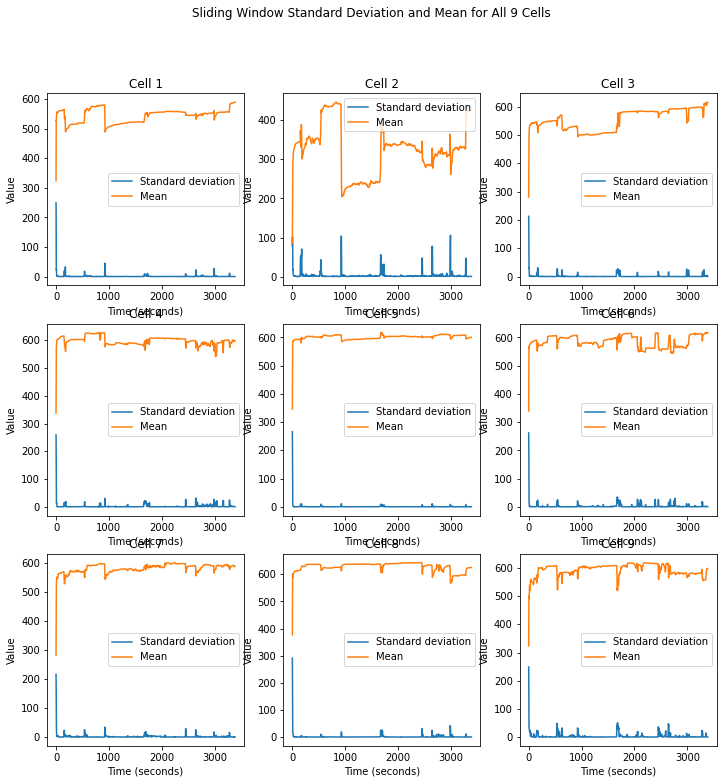

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assume 'data' is a NumPy array containing the pressure values for all 9 cells over time,
# with shape (n_samples, 9)

# Set the window size and stride for the sliding window
window_size = 10
stride = 1

# Create an empty list to hold the standard deviation and mean values for each cell
std_devs = []
means = []

# Iterate over each cell and calculate the sliding window standard deviation and mean values
for i in range(9):
    cell_data = df[:, i]
    std_devs.append(np.std([cell_data[j:j+window_size] for j in range(0, len(cell_data)-window_size+1, stride)], axis=1))
    means.append(np.mean([cell_data[j:j+window_size] for j in range(0, len(cell_data)-window_size+1, stride)], axis=1))

# Create a figure with 9 subplots (one for each cell)
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over each cell and plot the standard deviation and mean values on its subplot
for i in range(9):
    row = i // 3
    col = i % 3
    axs[row, col].plot(std_devs[i], label='Standard deviation')
    axs[row, col].plot(means[i], label='Mean')
    axs[row, col].set_title(f'Cell {i+1}')
    axs[row, col].set_xlabel('Time (seconds)')
    axs[row, col].set_ylabel('Value')
    axs[row, col].legend()

# Add a title to the entire figure
fig.suptitle('Sliding Window Standard Deviation and Mean for All 9 Cells')

# Show the plot
plt.show()


In [45]:
import numpy as np
import time



array([179.18985896, 114.20505924, 169.40368945, 193.02562006,
       190.95213187, 186.83760031, 177.2222992 , 197.38148061,
       171.18459497])

In [22]:

# Calculate some basic statistics on the data
mean_lb = np.mean(lb)
mean_mb = np.mean(mb)
mean_rb = np.mean(rb)
mean_lu = np.mean(lu)
mean_mu = np.mean(mu)
mean_ru = np.mean(ru)
mean_ll = np.mean(ll)
mean_ml = np.mean(ml)
mean_rl = np.mean(rl)

std_dev_lb = np.std(lb)
std_dev_mb = np.std(mb)
std_dev_rb = np.std(rb)
std_dev_lu = np.std(lu)
std_dev_mu = np.std(mu)
std_dev_ru = np.std(ru)
std_dev_ll = np.std(ll)
std_dev_ml = np.std(ml)
std_dev_rl = np.std(rl)

print(f'Mean of LB: {mean_lb}') 
print(f'Mean of MB: {mean_mb}') 
print(f'Mean of RB: {mean_rb}') 
print(f'Mean of LU: {mean_lu}') 
print(f'Mean of MU: {mean_mu}') 
print(f'Mean of RU: {mean_ru}') 
print(f'Mean of LL: {mean_ll}') 
print(f'Mean of ML: {mean_ml}') 
print(f'Mean of RL: {mean_rl}') 
print('\n')
print(f'SD of LB: {std_dev_lb}')
print(f'SD of MB: {std_dev_mb}') 
print(f'SD of RB: {std_dev_rb}') 
print(f'SD of LU: {std_dev_lu}') 
print(f'SD of MU: {std_dev_mu}') 
print(f'SD of RU: {std_dev_ru}') 
print(f'SD of LL: {std_dev_ll}') 
print(f'SD of ML: {std_dev_ml}') 
print(f'SD of RL: {std_dev_rl}') 


Mean of LB: 581.5683559222157
Mean of MB: 627.560695344726
Mean of RB: 593.2893341190336
Mean of LU: 597.4531526222746
Mean of MU: 600.6343547436653
Mean of RU: 585.5880966411314
Mean of LL: 542.8464938126104
Mean of ML: 322.99705362404245
Mean of RL: 554.4549204478492


SD of LB: 23.967621066417834
SD of MB: 25.711925680578467
SD of RB: 28.85583756857636
SD of LU: 24.849085161685515
SD of MU: 20.97216800781017
SD of RU: 28.53287530584168
SD of LL: 28.91168263580216
SD of ML: 64.18331503479466
SD of RL: 40.26198677303881


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


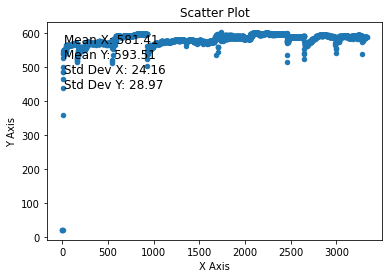

In [ ]:
# Extract the columns that we want to plot



# Calculate some basic statistics on the data
mean_x = np.mean(lb)
mean_y = np.mean(rb)
std_dev_x = np.std(lb)
std_dev_y = np.std(rb)

# Create a scatter plot of the data

data.reset_index().plot.scatter(x="index",y='LB')
#plt.scatter(data.index, rb)
plt.title('Scatter Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Calculate and plot a linear regression line
#m, b = np.polyfit(lb, df_time, 1)
#plt.plot(lb, m*lb + b, color='red')

# Display some statistics on the plot
textstr = f'Mean X: {mean_x:.2f}\nMean Y: {mean_y:.2f}\nStd Dev X: {std_dev_x:.2f}\nStd Dev Y: {std_dev_y:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Save the plot to a file
plt.savefig('scatter_plot.png')

# Show the plot
plt.show()